In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)'
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from tensorflow.keras import optimizers


import cv2
import math
import matplotlib.pyplot as plt
IMG_SIZE = 224

In [2]:
fire_model = load_model('vgg16.h5')

# Show the model architecture
#new_model.summary()

In [3]:
def prepare_image_for_prediction( img):
   
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    # The below function inserts an additional dimension at the axis position provided
    img = np.expand_dims(img, axis=0)
    # perform pre-processing that was done when resnet model was trained.
    return preprocess_input(img)

In [4]:
def draw_prediction( frame, class_string ):
    x_start = frame.shape[1] -600
    cv2.putText(frame, class_string, (x_start+250, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    return frame

In [5]:
label_dict={0:"None",1:"Fire",2:"Smoke"}

In [6]:
def get_display_string(pred_class, label_dict):
    txt = ""
    for c, confidence in pred_class:
        txt += label_dict[c]
        if c :
            txt += '['+ str(confidence) +']'
            print(txt)
    #print("count="+str(len(pred_class)) + " txt:" + txt)
    return txt

In [7]:

def predict (image): 
    frame= cv2.imread(image)
    resized_frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    frame_for_pred = prepare_image_for_prediction( resized_frame )
    pred_vec = fire_model.predict(frame_for_pred)
    #print(pred_vec)
    pred_class =[]
    print(pred_vec)
    confidence = np.round(pred_vec.max(),2) 
    print(confidence)
    if confidence > 0.2:
      pc = pred_vec.argmax()
      pred_class.append( (pc, confidence) )
    else:
      pred_class.append( (0, 0) )
    if pred_class:
      txt = get_display_string(pred_class, label_dict)       
      frame = draw_prediction( frame, txt )
      dst = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      plt.imshow(dst)

1/1 [==============================] - 0s 377ms/step
[[1.0601023e-02 9.8936403e-01 3.4855697e-05]]
0.99
Fire[0.99]


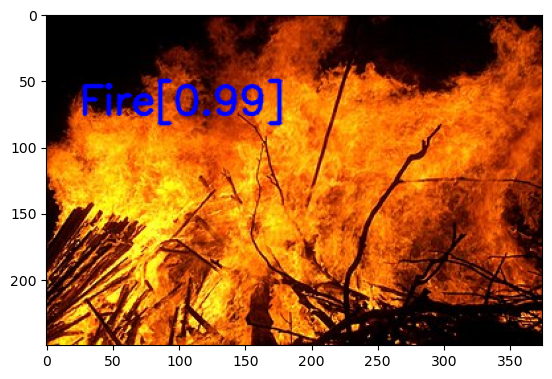

In [11]:
predict("f2.jpg")

1/1 [==============================] - 1s 1s/step
[[0.0027887  0.03754064 0.95967066]]
0.96
Smoke[0.96]


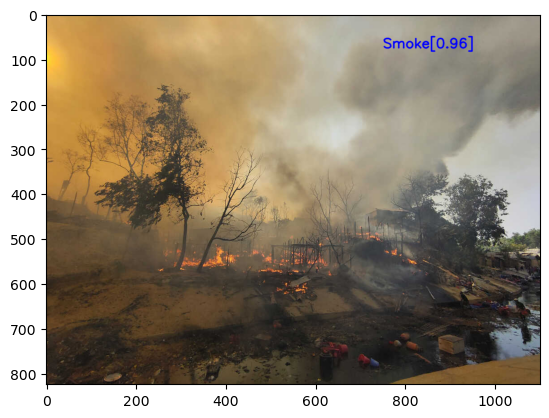

In [10]:
predict("fire.jpg")

1/1 [==============================] - 0s 435ms/step
[[0.03707953 0.960975   0.00194551]]
0.96
Fire[0.96]


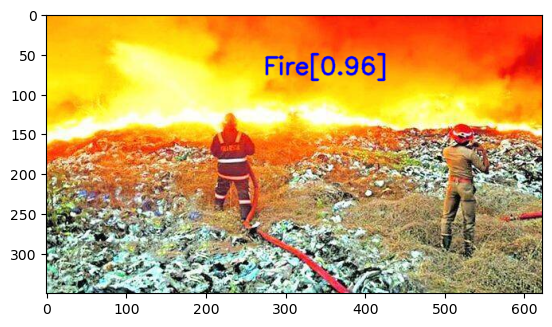

In [13]:
predict("bramapuram.jpg")